# Simple Linear Regression

# Dataset

Population of U.S. Cities

# Description

The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken
from the 196 largest cities in 1920.

# Format

This data frame contains the following columns:

u The 1920 population.

x The 1930 population.

Source:

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References:

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press

# Exploring and Understanding Data (EDA)

# 1. Load required Libraries

In [55]:
# supress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# 'Os' module provides functions for interacting with the operating system 
import os

# 'Pandas' is used for data manipulation and analysis
import pandas as pd 

# 'Numpy' is used for mathematical operations on large, multi-dimensional arrays and matrices
import numpy as np

# 'Matplotlib' is a data visualization library for 2D and 3D plots, built on numpy
import matplotlib.pyplot as plt
%matplotlib inline

# 'Seaborn' is based on matplotlib; used for plotting statistical graphics
import seaborn as sns

# 'Scikit-learn' (sklearn) emphasizes various regression, classification and clustering algorithms
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet

# 'Statsmodels' is used to build and analyze various statistical models
import statsmodels
import statsmodels.api as sm
import statsmodels.stats.api as sms
from statsmodels.tools.eval_measures import rmse
from statsmodels.compat import lzip
from statsmodels.graphics.gofplots import ProbPlot

# 'SciPy' is used to perform scientific computations
from scipy.stats import f_oneway
from scipy.stats import jarque_bera
from scipy import stats
from sklearn.linear_model import LinearRegression

# 2. Collect and load data

In [2]:
df = pd.read_csv('bigcity.csv')
df.head()

,Unnamed: 0,u,x
0,1,138,143
1,2,93,104
2,3,61,69
3,4,179,260
4,5,48,75


In [5]:
df = df.drop('Unnamed: 0',axis=1)

In [6]:
df.head()

,u,x
0,138,143
1,93,104
2,61,69
3,179,260
4,48,75


# 3. Explore numeric variables - five number summary

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
u,49.0,103.142857,104.405061,2.0,43.0,64.0,120.0,507.0
x,49.0,127.795918,123.121211,46.0,58.0,79.0,130.0,634.0


# 3a. Visualize numeric variables in boxplot and histograms
# 3b. Measure spread – variance and standard deviation

 Visualize numeric variables in boxplot and histograms

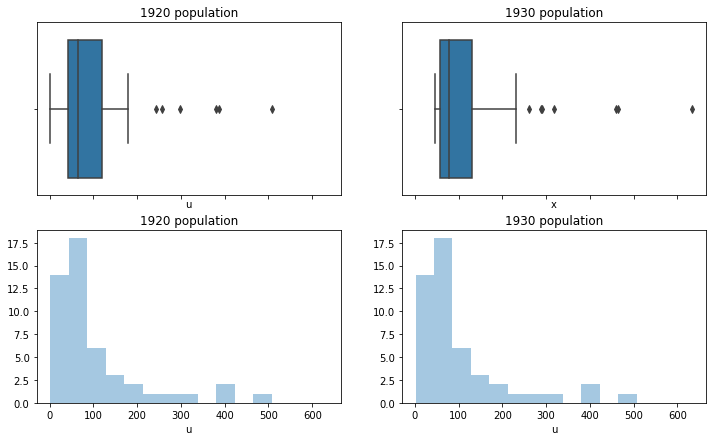

In [40]:
plt.rcParams['figure.figsize'] = (12,7)
fig,ax = plt.subplots(nrows=2,ncols=2,sharex=True)
sns.boxplot(df['u'],ax=ax[0,0])
sns.boxplot(df['x'],ax=ax[0,1])
sns.distplot(df['u'],ax=ax[1,0],kde=False)
sns.distplot(df['u'],ax=ax[1,1],kde=False)
ax[0,0].title.set_text('1920 population')
ax[0,1].title.set_text('1930 population')
ax[1,0].title.set_text('1920 population')
ax[1,1].title.set_text('1930 population')
plt.show()

In [ ]:
#Inference : Inference : U and X have almost same median. 
            u have outliers spread untill 500 whereas the x outliers are spread in wider range till 600+
            In u the max spread we can observe from 0 to 100
            In x we can see the spread of data from 50 to 150.

Measure spread – variance and standard deviation

In [35]:
print('Variance of population in 1920 i.e u:',round(df['u'].var(),2))
print('Variance of population in 1930 i.e x:',round(df['u'].var(),2))
print('standard deviation of population in 1920 i.e u:',round(df['x'].std(),2))
print('standard deviation of population in 1930 i.e x:',round(df['x'].std(),2))

Variance of population in 1920 i.e u: 10900.42
Variance of population in 1930 i.e x: 10900.42
standard deviation of population in 1920 i.e u: 123.12
standard deviation of population in 1930 i.e x: 123.12


In [41]:
#Inference : spread across both the years(1920 & 1930) are exactly similar

# 4. Explore relationships between variables using scatterplots and two-way cross tabulations

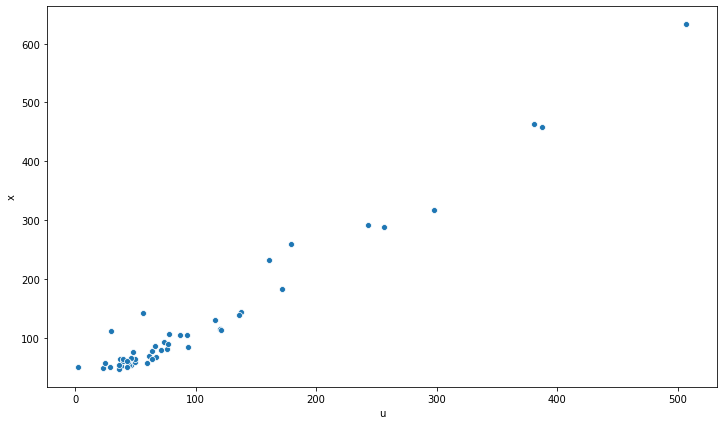

In [42]:
sns.scatterplot(df.u,df.x)
plt.show()

In [ ]:
#Inference:scatter plot says that both the years have positive correlation
#we cannot perform cross tabulation on two numerical columns

# 5. Transform the dataset
Find the number of rows in given dataset and separate the input and target variables into X and Y. Hint: You can shape function 
to get the size of the dataframe

In [47]:
X = df['u']
Y = df['x']
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=1)
print('X_train ',X_train.shape)
print('X_test ',X_test.shape)
print('Y_train ',Y_train.shape)
print('Y_test ',Y_test.shape)

X_train  (39,)
X_test  (10,)
Y_train  (39,)
Y_test  (10,)


In [ ]:
#Inference : splitted the data into train and test and the new shapes are above

# 6. Check the dataset for any missing values and also print out the correlation matrix
You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [49]:
df.isna().sum()
#There were no missing data in the data set

u    0
x    0
dtype: int64

In [50]:
df.corr()

,u,x
u,1.000000,0.981742
x,0.981742,1.000000


In [51]:
#Inference:After plotting correlation matrix we can see that u and x are highly correlated.

The high correlation betwwen u and x indicates that the variable u is a good predictor of variable x

# 7. Split data into train, test sets
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature 
sets.*
Check: train_test_split function

In [64]:
X = df[['u']]
Y = df[['x']]
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=10)
print('X_train ',X_train.shape)
print('X_test ',X_test.shape)
print('Y_train ',Y_train.shape)
print('Y_test ',Y_test.shape)

X_train  (39, 1)
X_test  (10, 1)
Y_train  (39, 1)
Y_test  (10, 1)


# 8. Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.
Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [65]:
lr = LinearRegression()
model = lr.fit(X_train,Y_train)
print('the coefficent of model is',model.coef_)
print('the intercept of model is',model.intercept_)

the coefficent of model is [[1.16155798]]
the intercept of model is [5.66252262]


# 9.  Linear Relationship between feature and target
Plot the line with b1 and b0 as slope and y-intercept.

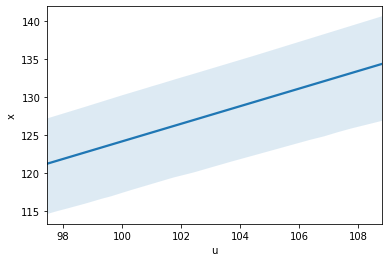

In [78]:
sns.regplot(df['u'],df['x'],scatter=False)
plt.show()

# 10. Evaluation of model with scikit-learn
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean 
square error over mean square error gives you root mean square error

In [94]:
lr = LinearRegression()
model = lr.fit(X_train,Y_train)

In [92]:
ypred=model.predict(X_train)
mse = mean_squared_error(ypred,Y_train)
r_score = model.score(X_train,Y_train)
adj_rsq = 1 - ((1-r_score)*(len(df)-1)/(len(df)-df.shape[1]-1))
print('The RMSE value is :',np.sqrt(mse))
print('R square value is train:',r_score)
print('Adj square value is train:',adj_rsq)

The RMSE value is : 21.391065474021044
R square value is train: 0.9737243775595024
Adj square value is train: 0.9725819591925242


In [93]:
ypred_test=model.predict(X_test)
mse = mean_squared_error(ypred_test,Y_test)
r_score = model.score(X_test,Y_test)
adj_rsq = 1 - ((1-r_score)*(len(df)-1)/(len(df)-df.shape[1]-1))
print('The RMSE test value is :',np.sqrt(mse))
print('R square value is test:',r_score)
print('Adj square value is test:',adj_rsq)

The RMSE test value is : 29.588647721155887
R square value is test: 0.7740675938150546
Adj square value is test: 0.764244445720057


In [ ]:
#Inference: as there is significant drop in R2 we say that model is overfit

# 11. Calculate the accuracy of the model for both training and test data set

Hint: .score() function

In [95]:
lr = LinearRegression()
model = lr.fit(X_train,Y_train)
ypred=model.predict(X_train)
r_score = model.score(X_train,Y_train)
print('R square value is train:',r_score)

R square value is train: 0.9737243775595024


In [96]:
ypred_test=model.predict(X_test)
r_score = model.score(X_test,Y_test)
print('R square value is test:',r_score) 

R square value is test: 0.7740675938150546


In [ ]:
#Inference: model is overfit